In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

import regression_funs as rfu


## constants and functions

In [67]:

PATH_TO_FILE = '../data_in/flexpart-mosaic-data_alias/AIRTRACER_100m.nc'

PATH_TO_SO2 = '../data_in/flexpart-mosaic-data_alias/MSAQSO2L4_2005-2018_v01-04_20190314.h5'

PATH_TO_ST = '../data_in/ciapitof_masked_filtered.csv'

PATH_TO_so2 = '../data_in/so2_concentrations.csv'

PATH_200_CLUS = '../data_out/cluster1000.nc'

LA = 'lat'
LO = 'lon'
TI = 'time'
AG = 'age'
AT = 'AIRTRACER'
L = 'lab'
CM = 'tab20'

SA = 'sa'
MSA = 'msa'
IA = 'ia'

BC = 'bc_masked_ngm3'

LBC = 'log(bc)'

SO2 = 'conc_raw_ppb'
SO2D = 'conc_despiked_ppb'
LSO2 = 'log(SO2)'

CO = 'conc_masked'
LCO = 'log(CO)'

LSA = 'log10(sa)'
LMSA = 'log10(msa)'
LIA = 'log10(ia)'

COLS = [SA, MSA, IA]
LCOLS = [LSA, LMSA, LIA]

DATA_OUT = '../data_out'

COL = plt.get_cmap('Dark2')

DC = {
    SA  : COL(0),
    MSA : COL(1),
    IA  : COL(2),
    LSA : COL(0),
    LMSA: COL(1),
    LIA : COL(2),
    BC  : COL(3),
    LBC : COL(3),
    SO2 : COL(4),
    LSO2: COL(4),
    CO  : COL(5),
    LCO : COL(5)
}

In [81]:
df = pd.read_csv(PATH_TO_so2, index_col=0, parse_dates=True)

In [82]:
df

,conc_raw_ppb,conc_despiked_ppb
time,,
2019-10-01 00:00:00,0.1428,0.1428
2019-10-01 00:01:00,0.0420,0.0420
2019-10-01 00:02:00,0.0840,0.0840
2019-10-01 00:03:00,0.0924,0.0924
2019-10-01 00:04:00,0.1008,0.1008
...,...,...
2020-09-30 23:55:00,0.1512,0.1512
2020-09-30 23:56:00,0.1260,0.1260
2020-09-30 23:57:00,0.1008,0.1008


<AxesSubplot:xlabel='time'>

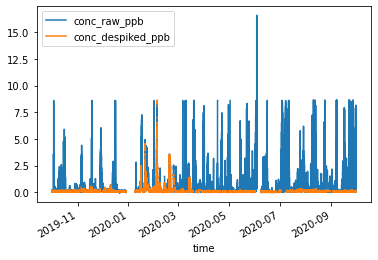

In [45]:
df.plot()

In [46]:
# plt.plot(df['conc_masked'], df['conc_raw'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 512838 entries, 2019-10-01 00:00:00 to 2020-09-30 23:59:00
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   conc_raw_ppb       492711 non-null  float64
 1   conc_despiked_ppb  189060 non-null  float64
dtypes: float64(2)
memory usage: 11.7 MB


In [48]:
# df = df - 80

In [49]:
SO2

'conc_raw_ppb'

In [50]:
df = df[df[SO2]>.5]

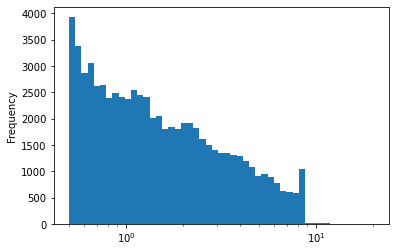

In [51]:
df[SO2].plot.hist(bins=np.geomspace(.5,20))
plt.gca().set_xscale('log')

In [68]:
df[SO2D]

time
2019-10-03 01:01:00   NaN
2019-10-03 01:02:00   NaN
2019-10-03 01:03:00   NaN
2019-10-03 01:04:00   NaN
2019-10-03 01:05:00   NaN
                       ..
2020-09-30 22:24:00   NaN
2020-09-30 22:25:00   NaN
2020-09-30 22:26:00   NaN
2020-09-30 22:27:00   NaN
2020-09-30 22:28:00   NaN
Name: conc_despiked_ppb, Length: 69209, dtype: float64

In [69]:


for l, c in zip([SO2], [LSO2]):
    df[c] = np.log10(df[l])

/var/folders/xl/wx70j1c50bsdzdy63_wpbhrxpglmw2/T/ipykernel_13713/3386153749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = np.log10(df[l])


# distributions


lets find what kind of dist. do we have. They seem to be log dists.

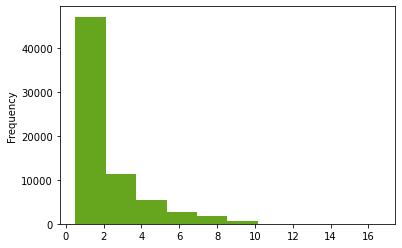

In [70]:
for c in [SO2]:
    df[c].plot.hist(color=DC[c])

Text(0.5, 0, 'log10')

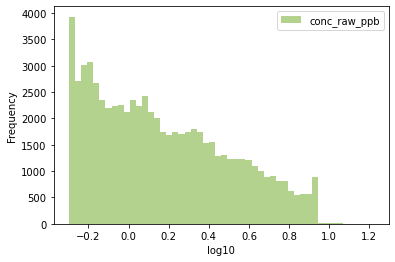

In [71]:
for c in [SO2]:
    np.log10(df[c]).plot.hist(alpha=.5, bins=50, label=c, color=DC[c])
ax = plt.gca()
ax.legend()
ax.set_xlabel('log10')

# timeseries of the trace gases

# open and merge flex 200 clusters

In [72]:
ds = xr.open_dataset(PATH_200_CLUS)

In [73]:
dsf = ds.groupby(L).sum().to_dataframe()[AT].unstack(L)

q0, q1 = np.quantile(dsf.values.flatten(), [.01, .99])



# f, axs = plt.subplots(10, 20, sharex=True, sharey=True, figsize=(20, 20))
# axf = axs.flatten()

# for i, ax in zip(dsf.columns, axf):
#     ax.hist(np.log10(dsf[i] + q0), bins=np.linspace(np.log10(q0), np.log10(q1 + q0), 20))
#     ax.set_xlabel('')
#     ax.set_ylabel('')

In [74]:
dsfn = dsf / dsf.mean()

In [75]:
q0, q1 = dsfn.stack().quantile([.01, .99])

In [76]:
# f, axs = plt.subplots(10, 20, sharex=True, sharey=True, figsize=(20, 20))
# axf = axs.flatten()

# for i, ax in zip(dsfn.columns, axf):
#     ax.hist(dsfn[i], bins=np.linspace(q0, q1, 20))
#     ax.set_xlabel('')
#     ax.set_ylabel('')

In [77]:
df1 = df

In [78]:
df2 = df1.resample('3H').median()

In [79]:
dm = pd.merge(df2, dsf, left_index=True, right_index=True, how='inner', validate="1:1")

# Invers modeling elastic NET

0.002292296140064103 0.1


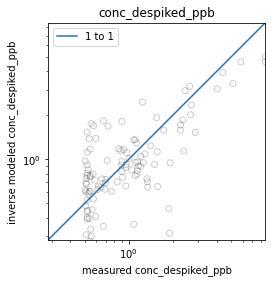

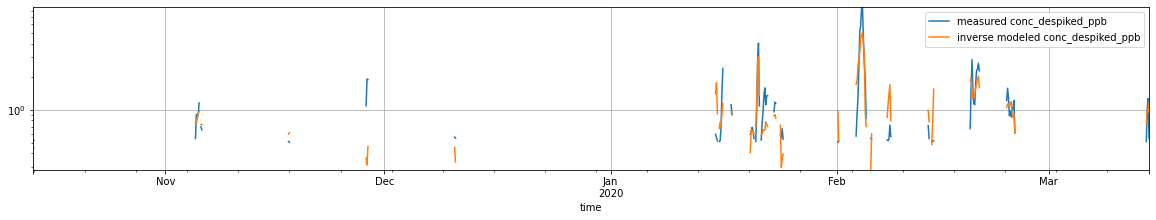

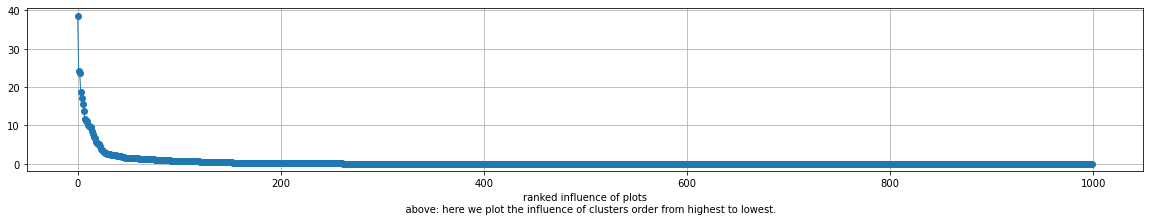

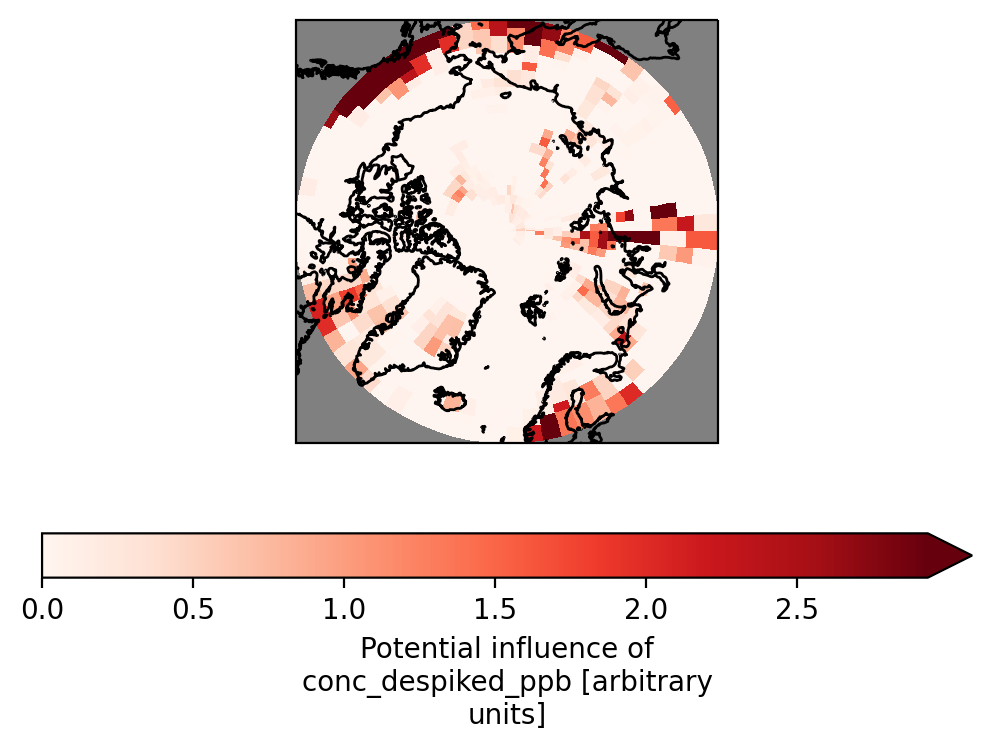

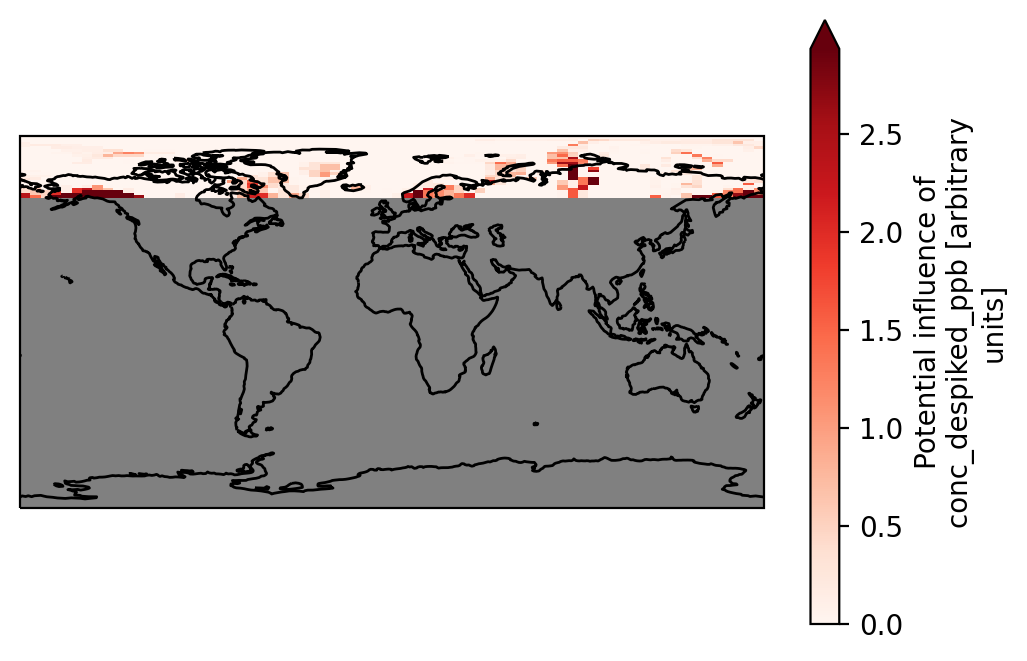

In [80]:
# for PAR in [SA,MSA,IA]:
for PAR in [SO2D]:
    pred, cdf, y, yn, dp = rfu.elastic_net_reg(dsf, dm, PAR)
    MEA = f'measured {PAR}'
    MOD = f'inverse modeled {PAR}'
    rfu.scatter_plot(y, yn, pred, MEA, MOD, PAR)
    rfu.mea_vs_mod_plot(y, yn, dp, pred, MEA, MOD)
    rfu.rank_cluster_inf(cdf)
    dd2 = rfu.get_plot_inf(cdf, L, ds,PAR)
    rfu.plot_map(dd2)
    rfu.plot_map_rect(dd2)

In [363]:
PAR = SO2
cdf.sort_values(ascending=False)

lab
199    1782.449463
198     597.959839
197     428.148621
181     235.689148
194     186.426331
          ...     
77        0.000000
172       0.000000
19        0.000000
174       0.000000
121       0.000000
Length: 200, dtype: float32

In [364]:
import funs as fu

In [365]:
d5 = fu.get_bounds(LA, ds[AT])
d6 = fu.get_bounds(LO, d5)

df = d6[L].to_dataframe()

df1 = df.loc[:, ~df.columns.duplicated()]

G = 'geometry'

In [366]:
df1[G] = df.apply(fu.get_pol, axis=1)

In [367]:
import geopandas
dg = geopandas.GeoDataFrame(df1).reset_index()

dg1 = dg[[L, G]].dissolve(by=L)

In [368]:
cdf.name = 'infl'

In [369]:
df2 = pd.merge(dg1,cdf,left_index=True,right_index=True)

In [370]:
df3 = df2.sort_values('infl',ascending=False).iloc[:20]

In [371]:
df3['infl']

lab
199    1782.449463
198     597.959839
197     428.148621
181     235.689148
194     186.426331
193     171.858521
184     166.487549
195     138.304916
173     126.520569
192     120.873734
188     113.172356
183     111.066063
190      96.381371
191      87.997276
180      82.804016
165      72.706085
159      70.772682
160      62.327602
141      58.066654
131      49.585014
Name: infl, dtype: float32

In [372]:
dm1 = dm[df3.index]

In [373]:
dm2 = dm1/dm1.sum()
dm2 = (dm1 * df3['infl'])/100000

In [374]:
cmap = plt.get_cmap('tab20')

In [375]:
co = dm2.columns

In [376]:
q1,q2=dm2.stack().quantile([.001,.999])

/Users/aliaga/miniforge3/envs/q5/lib/python3.9/site-packages/IPython/core/pylabtools.py:137: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


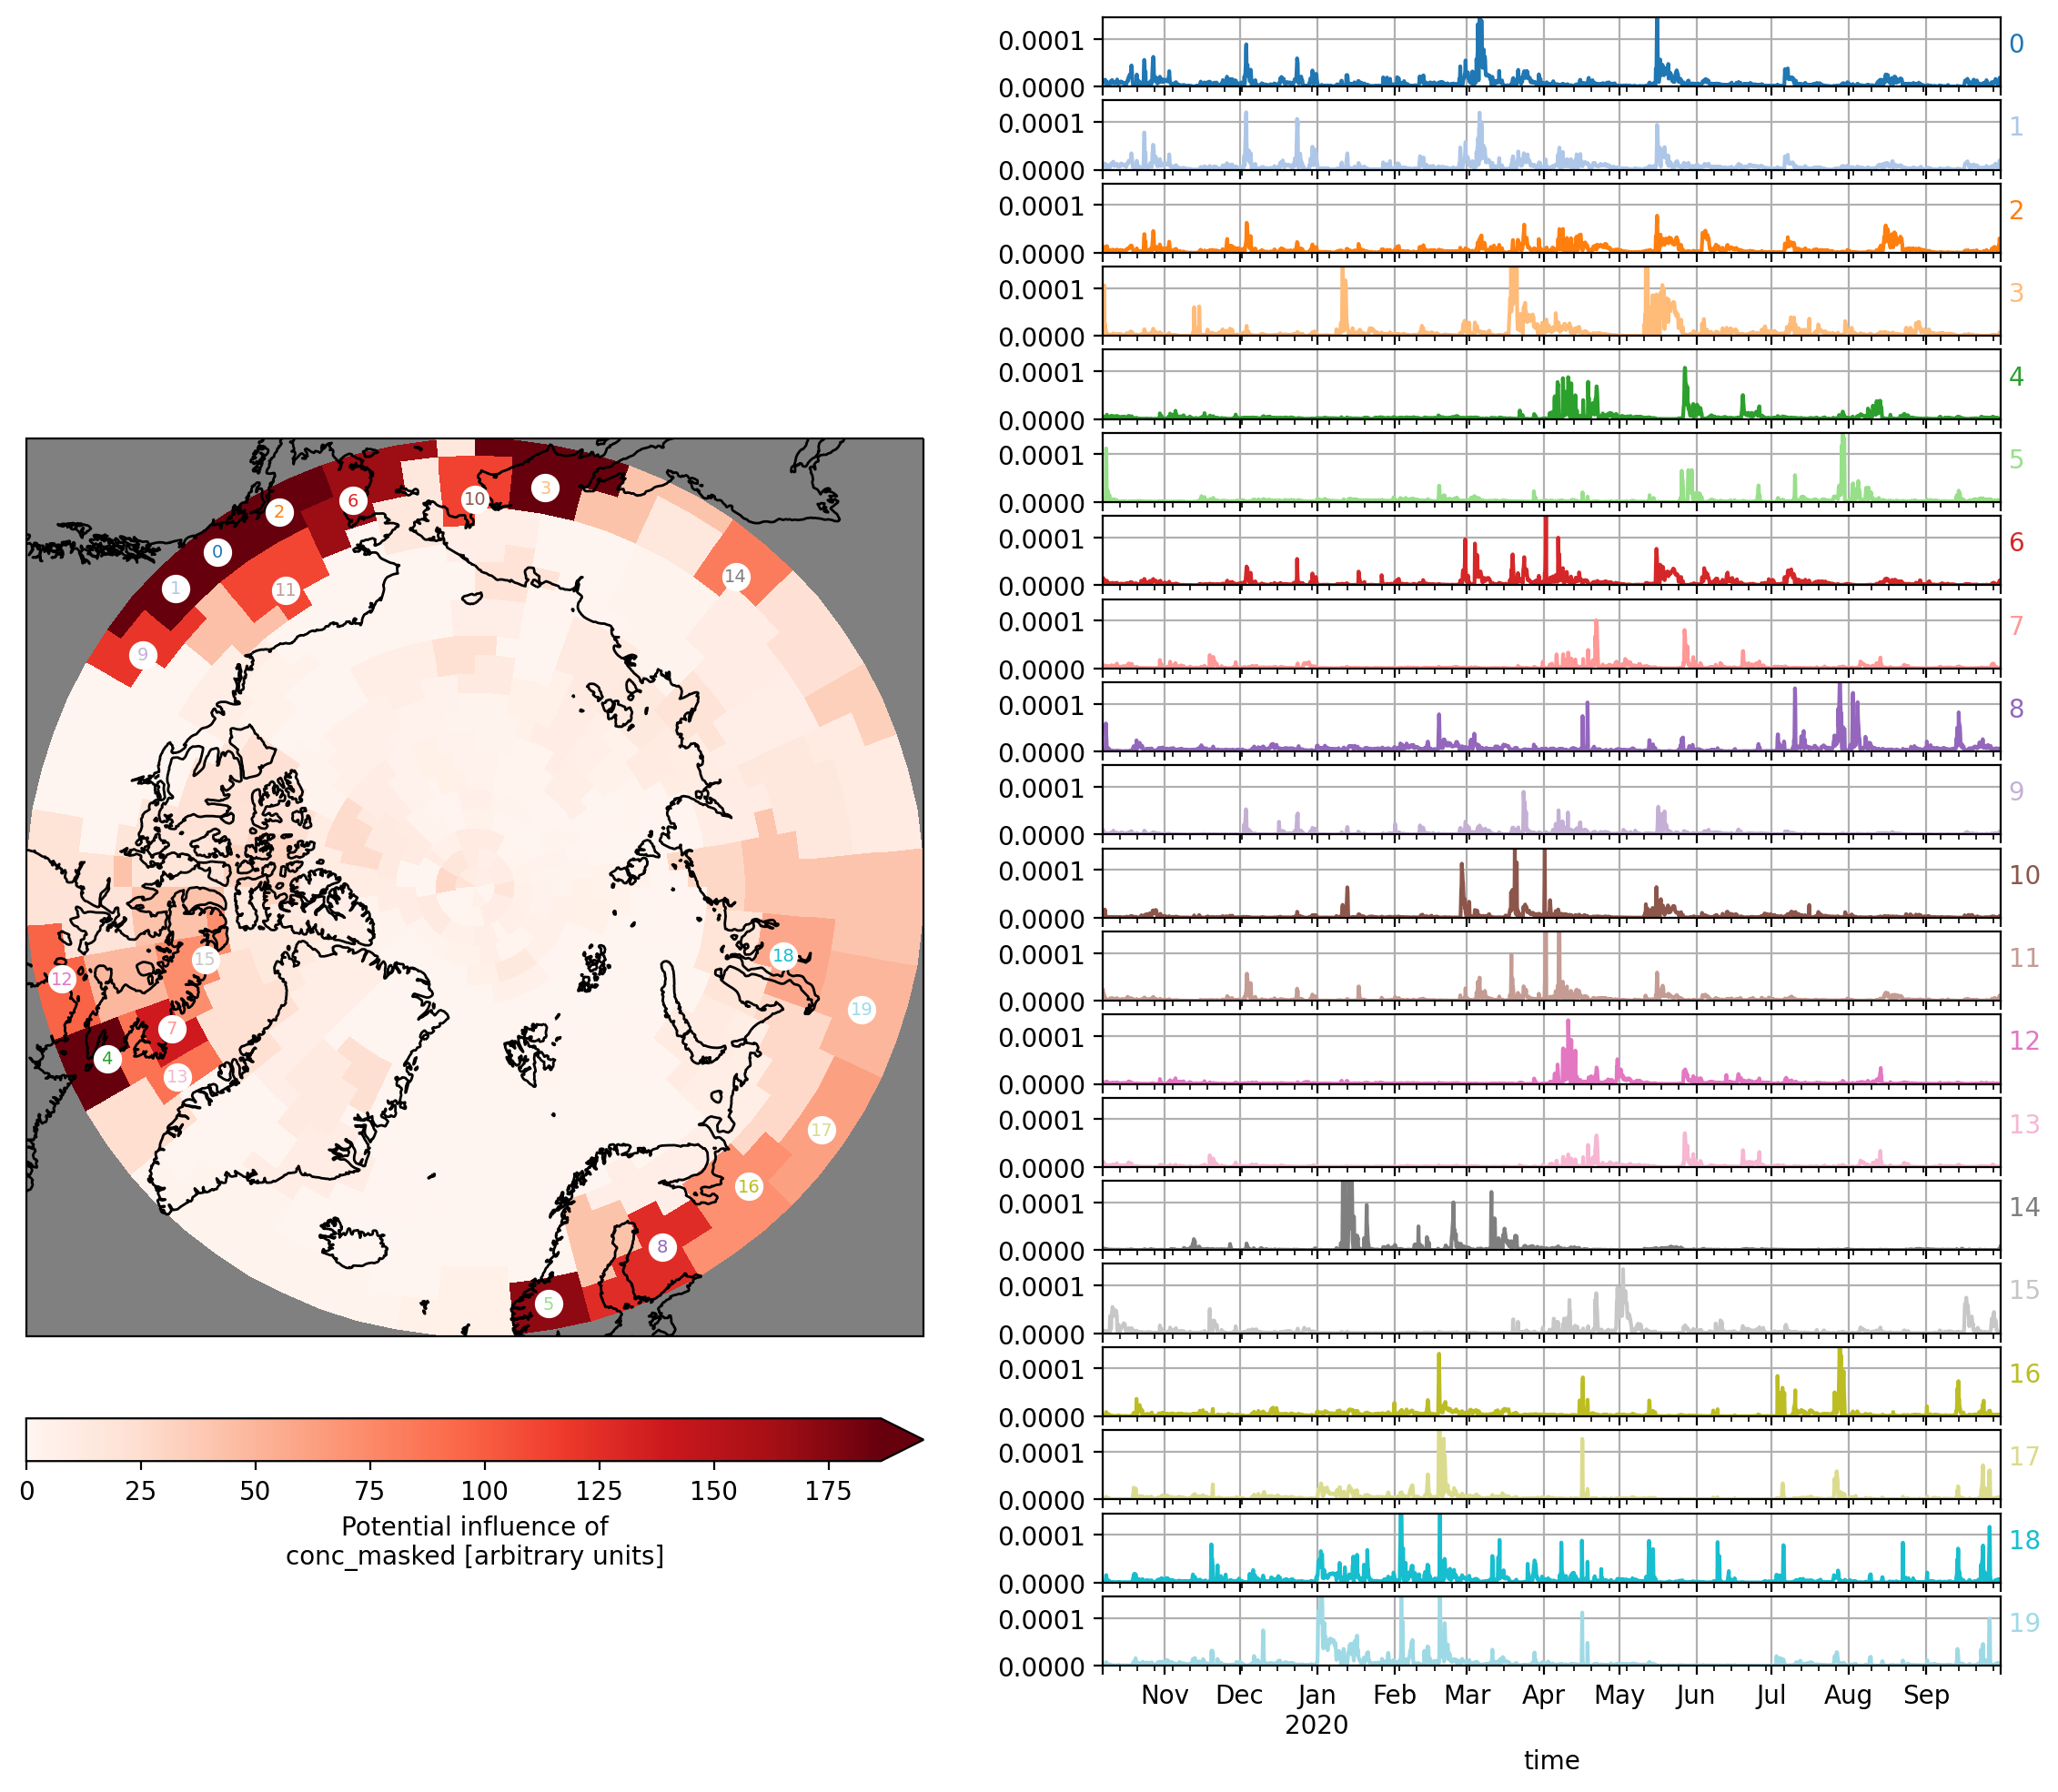

In [377]:
lco = len(co)

f = plt.figure(constrained_layout=True,figsize=(2*7,lco*.6),dpi=200)

import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(lco,2)




# f,axs=plt.subplots(lco,dpi=200,sharex=True,sharey=True,figsize=(7,lco*.6))


ax0 = None
for i,c in enumerate(co):
    ax = f.add_subplot(gs[i, 1],sharex=ax0)
    if i == 0: ax0 = ax
    (dm2[c]).plot(c=cmap(i),ax=ax)
    ax.text(1,.5,f' {i}',transform=ax.transAxes,c=cmap(i))
    ax.grid()
    ax.set_ylim(0,q2*1.1)
# ax=plt.gca()
# ax.set_yscale('log')
# ax.set_ylim(q1,q2)
# ax.legend(bbox_to_anchor=(1,1))


import cartopy.crs as ccrs
ax = f.add_subplot(gs[:,0],projection=ccrs.Orthographic(0, 90), facecolor="gray")
rfu.plot_map(dd2,ax=ax)
# ax=plt.gca()
for i,c in enumerate(co):
    p =df3.representative_point()[c]
    ax.scatter( p.x,p.y,transform=ccrs.PlateCarree(),c='w',s=105,alpha=1,zorder=19)
    ax.text( p.x,p.y,i,transform=ccrs.PlateCarree(),c=cmap(i),va='center',ha='center',fontsize=7,zorder = 20)



In [378]:
    from sklearn.linear_model import ElasticNetCV,ElasticNet

    c200 = dsf.columns

    X = dm[c200]

    xn = np.sqrt((X ** 2).sum())

    XX = X.divide(xn, axis=1)


    y = dm[PAR]
    yn = y.notna()
    y = y[yn]
    ii = [.1, .5, .7, .9, .95, .99, 1]
    regr = ElasticNetCV(cv=5, random_state=0, positive=True, l1_ratio=ii, fit_intercept=False)
#     regr = ElasticNet( random_state=0, positive=True, l1_ratio=ii, fit_intercept=False)

    regr.fit(XX[yn], y[yn])

    pred = regr.predict(XX[yn])
    dp = pd.Series(pred, index=y[yn].index)
    cdf = pd.Series(regr.coef_, index=XX.columns)
    cdf = cdf / xn

In [379]:
regr = ElasticNetCV(alphas=.5,cv=5, random_state=0, positive=True, l1_ratio=ii, fit_intercept=False)

In [394]:
ccs = {}
r = {}
for a in np.geomspace(.01,1,201):
    from sklearn.linear_model import ElasticNetCV,ElasticNet

    c200 = dsf.columns

    X = dm[c200]

    xn = np.sqrt((X ** 2).sum())

    XX = X.divide(xn, axis=1)


    y = dm[PAR]
    yn = y.notna()
    y = y[yn]
    ii = [.1, .5, .7, .9, .95, .99, 1]
#     
    regr = ElasticNet(alpha=a, random_state=0, positive=True, l1_ratio=1, fit_intercept=False)

    regr.fit(XX[yn], y[yn])

    pred = regr.predict(XX[yn])
    dp = pd.Series(pred, index=y[yn].index)
    cdf = pd.Series(regr.coef_, index=XX.columns)
    cdf = cdf
    cdf = cdf/cdf.sum()
    ccs[a]=cdf
    r[a]=regr.score(XX[yn], y[yn])

In [395]:
regr = ElasticNetCV(cv=5, random_state=0, positive=True, l1_ratio=ii, fit_intercept=False)
regr.fit(XX[yn], y[yn])

ElasticNetCV(cv=5, fit_intercept=False,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], positive=True,
             random_state=0)

In [396]:
regr.alpha_

0.0010640271366434524

<AxesSubplot:>

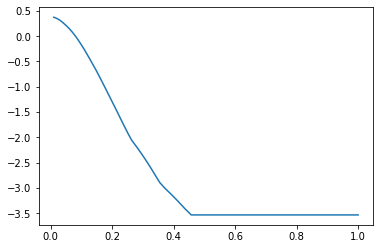

In [397]:
pd.Series(r).plot()

In [398]:
ddd = pd.DataFrame(ccs).T

In [399]:
ddd

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0.010000,0.022990,0.0,0.001901,0.0,0.0,0.009436,0.003677,0.0,0.007801,0.002158,...,0.001808,0.0,0.0,0.007287,0.028126,0.003661,0.0,0.003707,0.024785,0.013369
0.010233,0.022975,0.0,0.001961,0.0,0.0,0.009415,0.003663,0.0,0.007761,0.002190,...,0.001759,0.0,0.0,0.007263,0.028225,0.003628,0.0,0.003841,0.025007,0.013261
0.010471,0.022960,0.0,0.002022,0.0,0.0,0.009394,0.003649,0.0,0.007719,0.002222,...,0.001708,0.0,0.0,0.007238,0.028327,0.003594,0.0,0.003979,0.025235,0.013151
0.010715,0.022944,0.0,0.002084,0.0,0.0,0.009372,0.003635,0.0,0.007675,0.002256,...,0.001656,0.0,0.0,0.007213,0.028431,0.003559,0.0,0.004121,0.025467,0.013039
0.010965,0.022929,0.0,0.002147,0.0,0.0,0.009349,0.003620,0.0,0.007630,0.002290,...,0.001603,0.0,0.0,0.007187,0.028537,0.003523,0.0,0.004266,0.025705,0.012926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.912011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.933254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.954993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.977237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [400]:
l = []
for a,r in ddd.iloc[::-1].iloc[::].iterrows():
    
    rr = r[~r.index.isin(l)]

    try:
        iii = rr.idxmax()
    #     print(iii)
        if rr.sum() == 0:
            continue
#             print(a)
        l.append(iii)
    except:
        break
    
    

In [401]:
len(l)

90

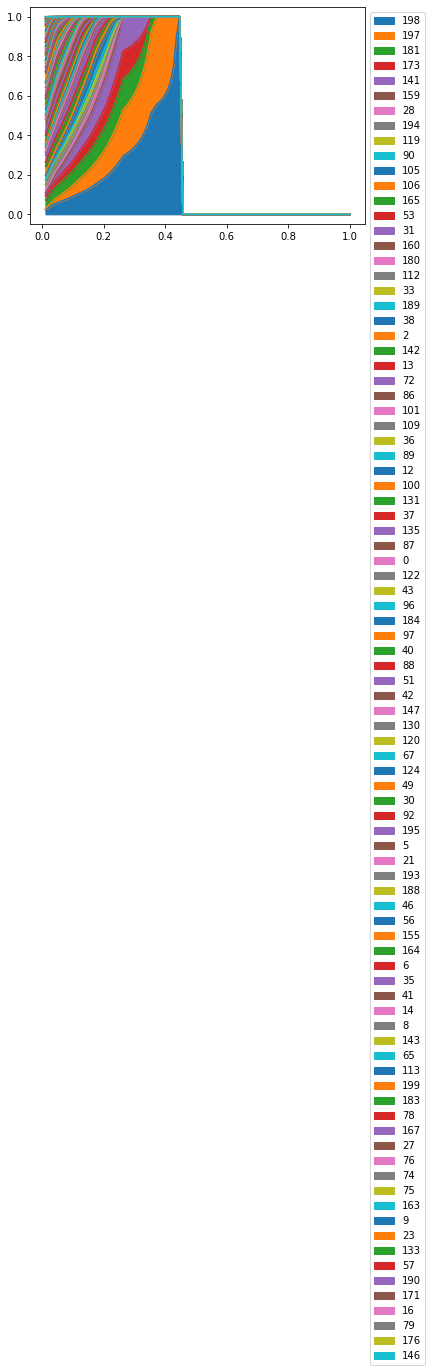

In [402]:
ddd[l].plot.area()
ax = plt.gca()
ax.legend(bbox_to_anchor=(1,1))
# ax.legend().remove()

In [403]:
rem = set(ddd.columns)-set(l)
l1 = [*l,*rem]

In [404]:
dd = pd.Series(l1).reset_index().set_index(0)['index'].to_dict()

In [405]:
ds2 = ds[L].to_series().replace(dd).to_xarray()

In [406]:
ds

<xarray.Dataset>
Dimensions:    (lon: 72, lat: 24, time: 3021)
Coordinates:
  * lon        (lon) float64 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * lat        (lat) float64 60.62 61.88 63.12 64.38 ... 85.62 86.88 88.12 89.38
  * time       (time) datetime64[ns] 2019-09-20T09:00:00 ... 2020-10-01T21:00:00
    lab        (lat, lon) int64 162 193 193 173 173 173 ... 123 123 123 123 144
Data variables:
    AIRTRACER  (time, lat, lon) float32 0.0004269 0.0001852 ... 0.0002132

In [407]:
q1,q2 = ds[AT].sum('time').quantile([.01,.5])

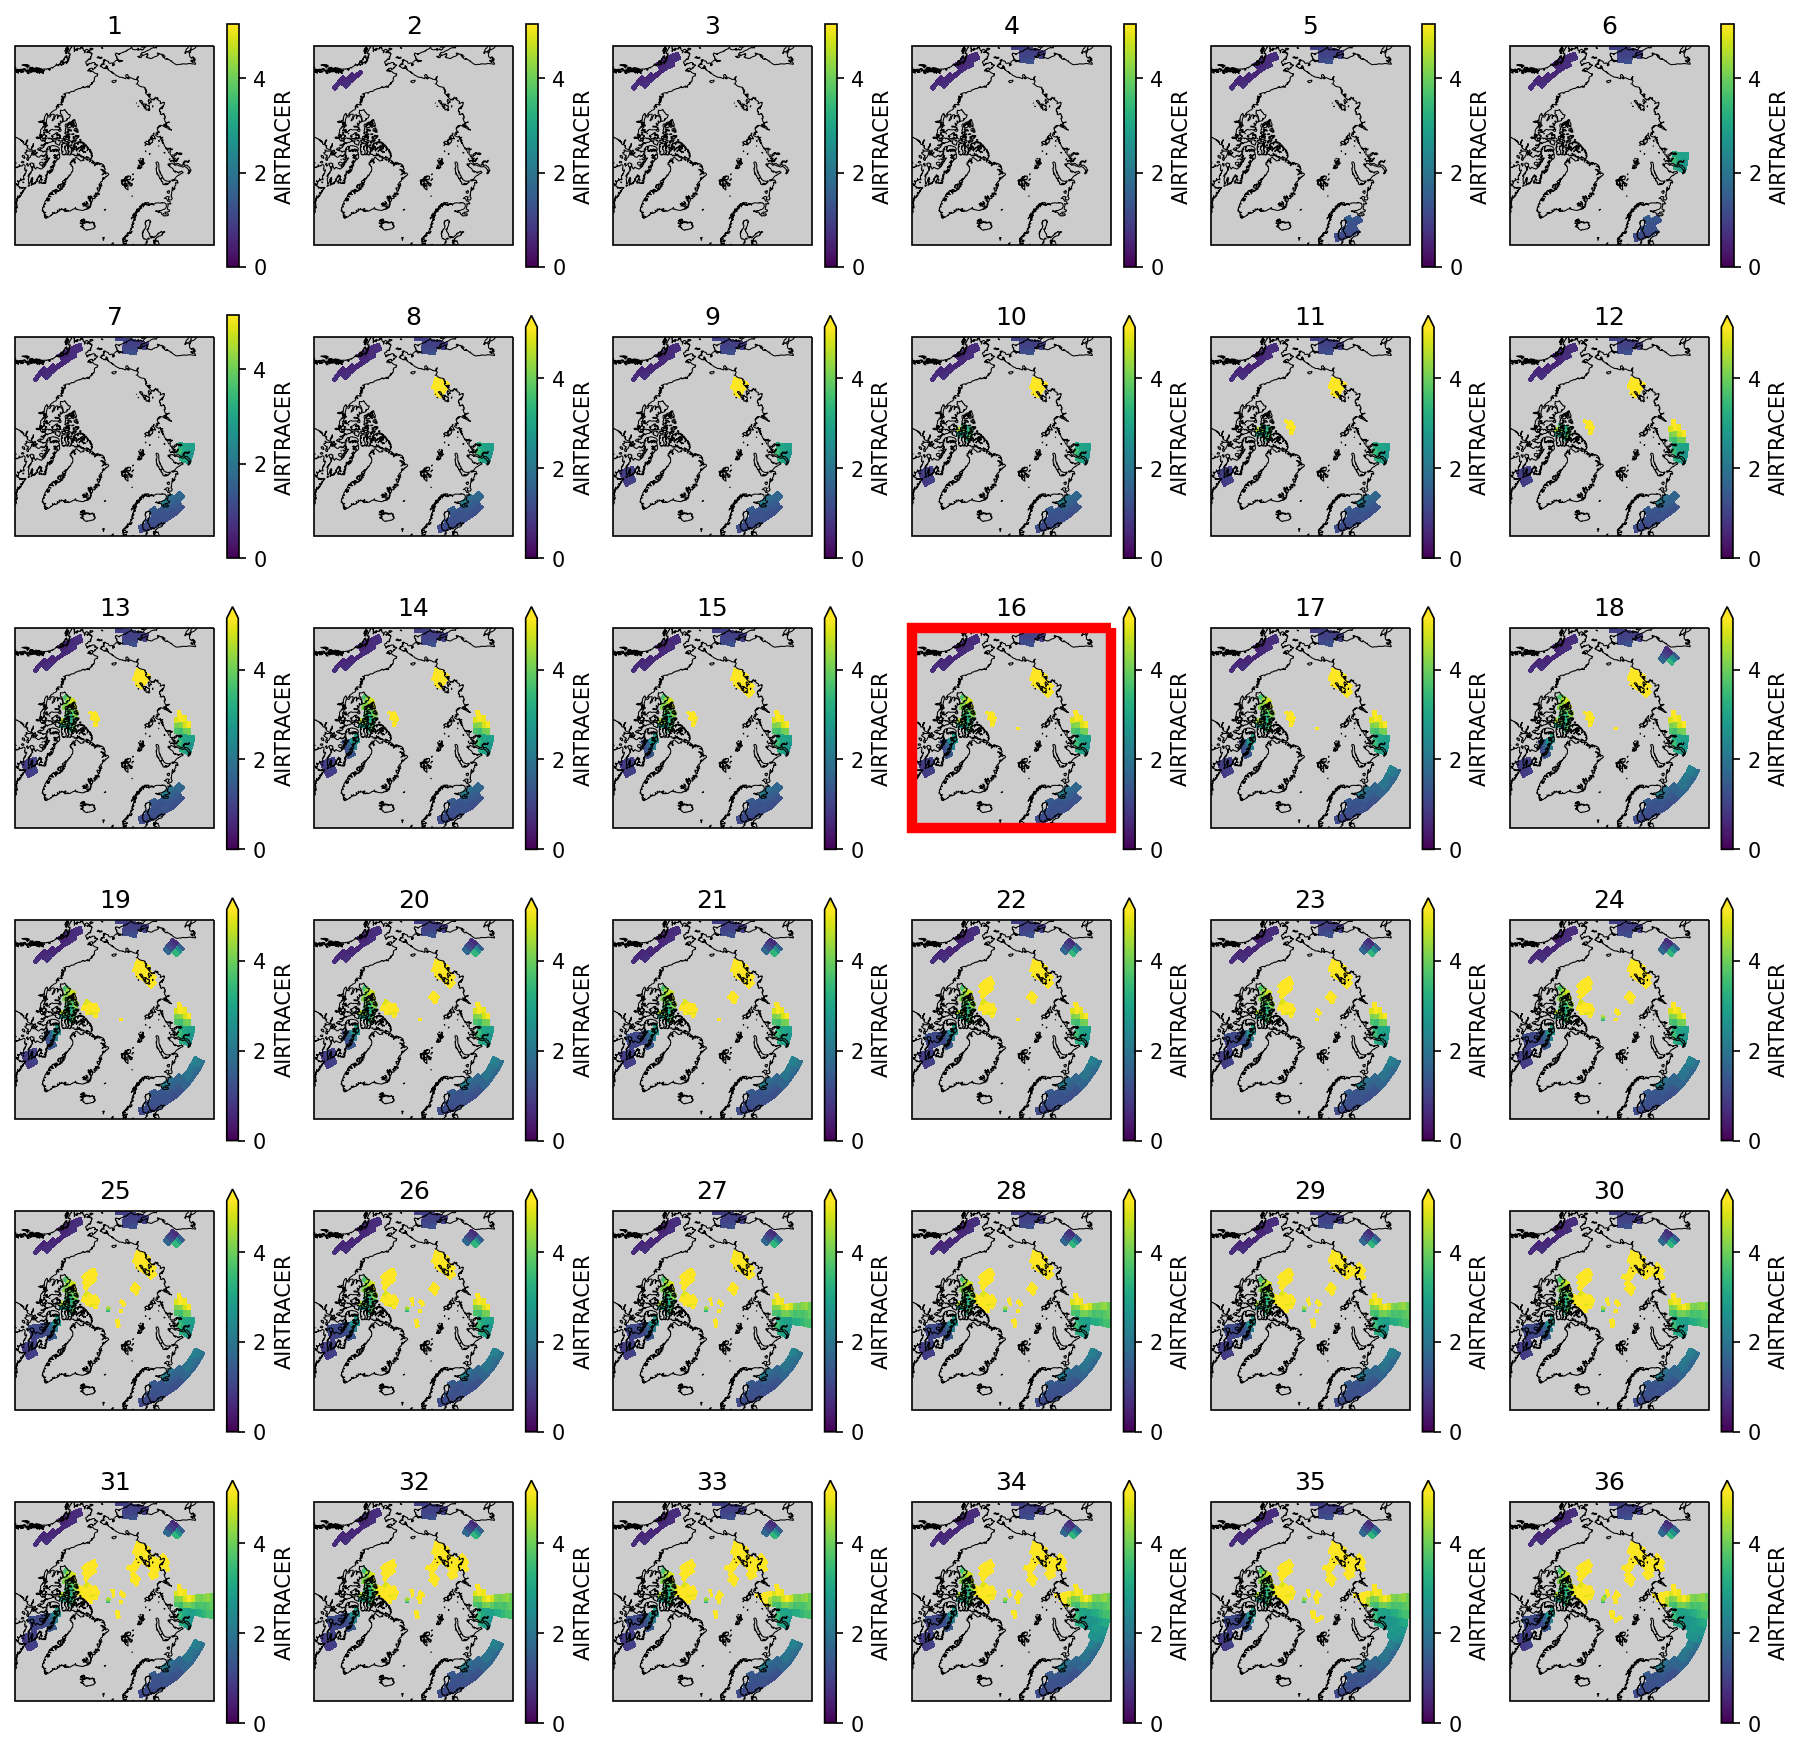

In [408]:
AA=15
import matplotlib as mpl
dic = dict(projection=ccrs.Orthographic(0, 90), facecolor=".8")


f, axs = plt.subplots(6,6,subplot_kw=dic, sharex=True,sharey=True,figsize=(15,15),dpi=150)
for i in range(36):
    ax = axs.flatten()[i]
    p=ds[AT].sum('time').where(ds2<i).plot(
        # subplot_kws=dic,
        transform=ccrs.PlateCarree(),
    #     norm=mpl.colors.LogNorm(vmin, vmax),
    #     robust=True,
        cmap='viridis',
        vmax=q2,
        vmin=0,
        ax=ax
        
    )
    ax.set_title(i+1)
    if i ==AA:    
        for spine in ax.spines.values():
            spine.set_edgecolor('red')
            spine.set_linewidth(5)
    p.axes.coastlines(lw=.5)



In [409]:
ds16 = ds[AT].sum('time').where(ds2<i)

In [410]:
ds16.to_dataframe()

lab  AIRTRACER
lat    lon                  
60.625 2.5    162        NaN
       7.5    193        NaN
       12.5   193        NaN
       17.5   173   1.107274
       22.5   173   1.101493
...           ...        ...
89.375 337.5  123        NaN
       342.5  123        NaN
       347.5  123        NaN
       352.5  123        NaN
       357.5  144        NaN

[1728 rows x 2 columns]

In [411]:
import geopandas

d5 = fu.get_bounds(LA, ds[AT])
d6 = fu.get_bounds(LO, d5)

df = d6[L].to_dataframe()

df1 = df.loc[:, ~df.columns.duplicated()]

G = 'geometry'

df1[G] = df.apply(fu.get_pol, axis=1)


dg = geopandas.GeoDataFrame(df1).reset_index()

dg1 = dg[[L, G]].dissolve(by=L)

<AxesSubplot:>

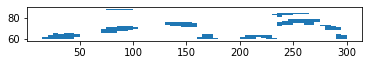

In [412]:
dg2=dg1[dg1.index.isin(l[:AA])]
dg2.plot()

In [413]:
dg3 = dg2.set_crs(ccrs.PlateCarree()).to_crs(ccrs.Orthographic(0, 90))

In [414]:
mpol = dg3.unary_union

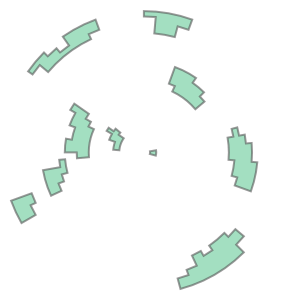

In [415]:
mpol

In [416]:
pols = list(mpol)

In [417]:
pols

In [418]:
pols_se = geopandas.GeoDataFrame(geometry=pols)

In [419]:
pols_se = pols_se[:]

In [420]:
pols_se['area'] = pols_se.area

In [421]:
ps1 = pols_se.sort_values('area')[::-1].reset_index(drop=True)

In [422]:
ps2=ps1.set_crs(ccrs.Orthographic(0, 90)).to_crs(ccrs.PlateCarree())

<AxesSubplot:>

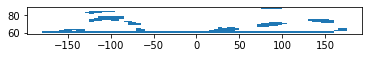

In [423]:
ps2['geometry'].plot()

In [424]:
from shapely import geometry

In [425]:
df= ds.to_dataframe()

In [426]:
i

35

In [427]:
dg3 = dg2.set_crs(ccrs.PlateCarree()).to_crs(ccrs.Orthographic(0, 90))

In [428]:
iv = {}
for i,v in dg3.representative_point().items():
    nn = ps1[ps1.contains(v)]
    n = nn.index[0]
    iv[i]=n

In [429]:
iv

{28: 4,
 31: 9,
 53: 4,
 90: 8,
 105: 1,
 106: 3,
 119: 3,
 141: 1,
 159: 0,
 165: 6,
 173: 0,
 181: 5,
 194: 7,
 197: 2,
 198: 2}

In [430]:
dss =ds.to_dataframe()

In [431]:
dss

lab  AIRTRACER
lon   lat    time                               
2.5   60.625 2019-09-20 09:00:00  162   0.000427
             2019-09-20 12:00:00  162   0.000354
             2019-09-20 15:00:00  162   0.000287
             2019-09-20 18:00:00  162   0.000290
             2019-09-20 21:00:00  162   0.000438
...                               ...        ...
357.5 89.375 2020-10-01 09:00:00  144   0.000007
             2020-10-01 12:00:00  144   0.000006
             2020-10-01 15:00:00  144   0.000010
             2020-10-01 18:00:00  144   0.000009
             2020-10-01 21:00:00  144   0.000213

[5220288 rows x 2 columns]

In [432]:
dss1 = dss[dss[L].isin(l[:AA])].copy()

In [433]:

NL = 'nl'

In [434]:
dss1[NL] = dss1[L].replace(iv)

In [435]:
dss2 = dss1.where(dss1[NL]<9)

In [436]:
ndf = dss2.reset_index().groupby([NL,'time'])[AT].sum().unstack().T

In [437]:
ndf

nl,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
time,,,,,,,,,
2019-09-20 09:00:00,0.003671,0.003099,0.002981,0.000821,0.006292,0.008871,0.000379,0.000703,0.000227
2019-09-20 12:00:00,0.003807,0.003258,0.003314,0.000762,0.006547,0.012416,0.000364,0.000645,0.000209
2019-09-20 15:00:00,0.003294,0.003255,0.003932,0.000739,0.005551,0.017557,0.000386,0.000577,0.000221
2019-09-20 18:00:00,0.003018,0.002807,0.003154,0.000766,0.005804,0.021219,0.000360,0.000446,0.000262
2019-09-20 21:00:00,0.004422,0.003832,0.002159,0.000677,0.005392,0.011202,0.000453,0.000814,0.000315
...,...,...,...,...,...,...,...,...,...
2020-10-01 09:00:00,0.009443,0.022197,0.002532,0.025613,0.051853,0.000598,0.001191,0.000974,0.022935
2020-10-01 12:00:00,0.007835,0.022296,0.001988,0.019004,0.050856,0.000395,0.001248,0.000943,0.034734
2020-10-01 15:00:00,0.009899,0.021000,0.001866,0.015961,0.044831,0.000345,0.001244,0.000971,0.022527


<AxesSubplot:xlabel='time'>

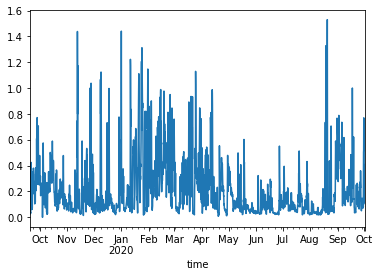

In [438]:
dss1.reset_index().groupby([NL,'time'])[AT].sum().unstack().sum().plot()

In [439]:
ndf.columns

Float64Index([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0], dtype='float64', name='nl')

In [440]:
ndm = ndf.copy()

In [441]:
ndm[PAR]=dm[PAR]

In [442]:
    from sklearn.linear_model import ElasticNetCV,ElasticNet, LinearRegression

    c200 = ndf.columns

    X = ndm[c200]

    xn = np.sqrt((X ** 2).sum())

    XX = X.divide(xn, axis=1)


    y = ndm[PAR]
    yn = y.notna()
    y = y[yn]
    ii = [.1, .5, .7, .9, .95, .99, 1]
#     
    regr = LinearRegression( positive=True, fit_intercept=False)

    regr.fit(XX[yn], y[yn])

    pred = regr.predict(XX[yn])
    dp = pd.Series(pred, index=y[yn].index)
    cdf = pd.Series(regr.coef_, index=XX.columns)
    cdf = cdf
#     cdf = cdf/cdf.sum()

    r2=regr.score(XX[yn], y[yn])

/Users/aliaga/miniforge3/envs/q5/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/Users/aliaga/miniforge3/envs/q5/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/Users/aliaga/miniforge3/envs/q5/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


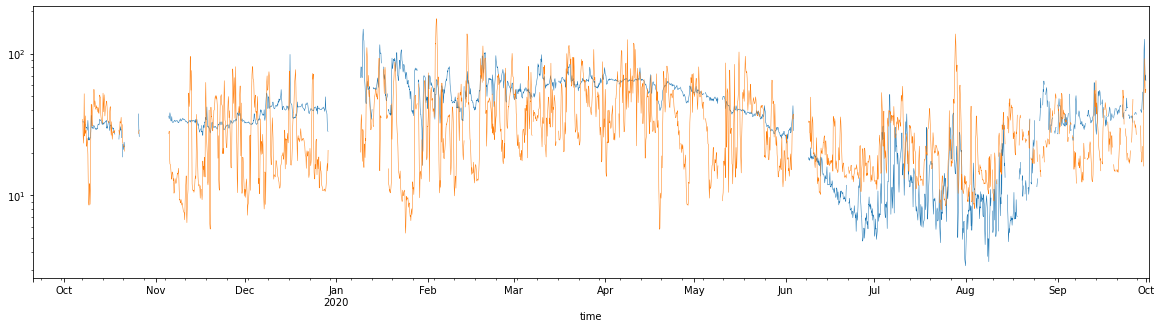

In [443]:
f,ax=plt.subplots(figsize=(20,5))
mod_ = (ndf/xn * cdf).sum(axis=1).where(yn)
ndm[PAR].where(yn).plot(label=f"{PAR} measured",lw=.5)
mod_.plot(label=f"{PAR} inverse modeled",lw=.5)
plt.gca().set_yscale('log')

In [444]:
dum = pd.DataFrame()
dum['mea'] = ndm[PAR].where(yn)
dum['mod'] = mod_

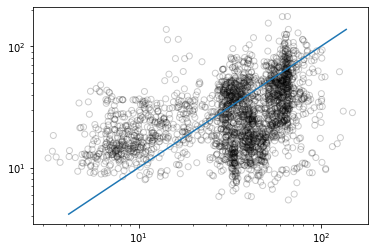

In [445]:
plt.scatter(dum['mea'],dum['mod'],alpha=.2, edgecolor='k', facecolor='none', )
ax= plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

q0, q1 = np.quantile([*dum[yn]['mea'].values,*dum[yn]['mod'].values], [.001, .999])

ax.plot(
    [q0, q1],
    [q0, q1],
    label=('1 to 1')
)

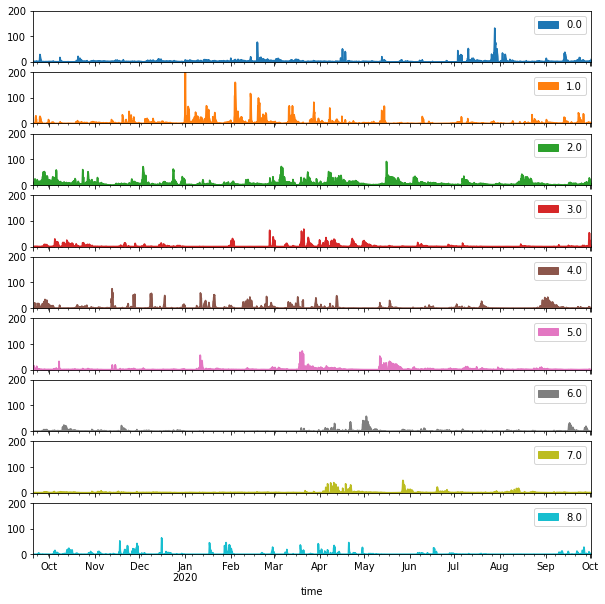

In [446]:
eight_=(ndf/xn * cdf)
eight_.plot.area(figsize=(10,10),subplots=True,sharey=True,ylim=(0,2e2),cmap='tab10')
ax = plt.gca()

<AxesSubplot:>

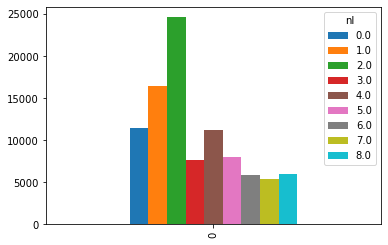

In [447]:
eight_.sum().to_frame().T.plot.bar(cmap='tab10')

<AxesSubplot:xlabel='nl'>

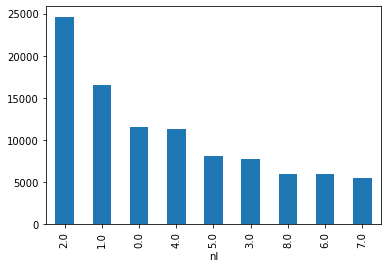

In [448]:
order = eight_.sum().sort_values()[::-1]
order.plot.bar()

In [449]:
eight_.to_csv('../data_out/eight_BC_sources_inverse.csv')

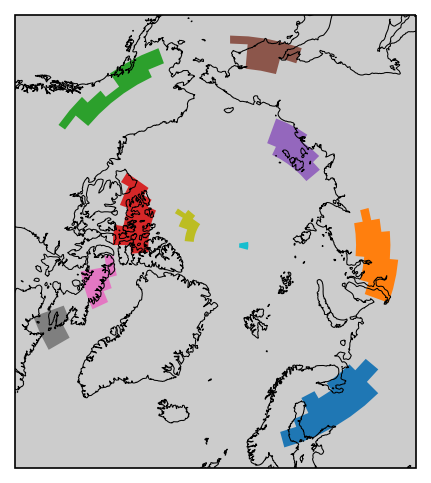

In [450]:
dic = dict(projection=ccrs.Orthographic(0, 90), facecolor=".8")
f, ax = plt.subplots(subplot_kw=dic, sharex=True,sharey=True,dpi=150)
ps1.reset_index().plot(column='index',cmap='tab10',ax=ax,transform=ccrs.Orthographic(0, 90))
ax.coastlines(lw=.5)

(0.0, 90.0)

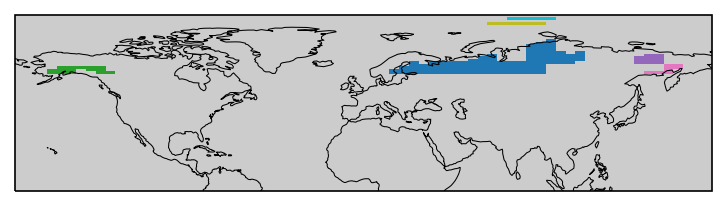

In [209]:
dic = dict(projection=ccrs.PlateCarree(), facecolor=".8")
f, ax = plt.subplots(subplot_kw=dic, sharex=True,sharey=True,dpi=150)
ps1.reset_index().plot(column='index',cmap='tab10',ax=ax,transform=ccrs.Orthographic(0, 90))
ax.coastlines(lw=.5)
ax.set_ylim(0,90)

In [210]:
dss1.to_xarray()[AT][{'time':2}]

<xarray.DataArray 'AIRTRACER' (lon: 32, lat: 16)>
array([[1.08371722e-04, 1.36693372e-04,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan],
       [1.13848124e-04, 1.18038901e-04, 1.03157370e-04,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan],
       [1.17111129e-04, 1.23705991e-04, 1.27007006e-04, 1.27462859e-04,
        1.38275776e-04,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan],
       [9.68725872e-05, 1.52492212e-04, 1.68134866e-04, 2.07272489e-04,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan],
       [4.93140869e-05, 1.05575491e-04, 1.75402427e-04, 1.94428241e-04,
        1.94960172e-04,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan],
...
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan],
       [           nan,            nan, 1.01525307e-04,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan],
       [           nan, 3.84267187e-05, 3.48547146e-05,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan],
       [1.36702647e-05, 1.98245962e-05, 2.88337669e-05,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan],
       [2.83440677e-05,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan]],
      dtype=float32)
Coordinates:
  * lon      (lon) float64 17.5 22.5 27.5 32.5 37.5 ... 217.5 222.5 227.5 232.5
  * lat      (lat) float64 60.62 61.88 63.12 64.38 ... 73.12 74.38 75.62 76.88
    time     datetime64[ns] 2019-09-20T15:00:00

In [242]:
#convert to mrakdown
!jupyter-nbconvert --to markdown z030_inverse_modeling_time_series.ipynb

[NbConvertApp] Converting notebook z030_inverse_modeling_time_series.ipynb to markdown
[NbConvertApp] Support files will be in z030_inverse_modeling_time_series_files/
[NbConvertApp] Making directory z030_inverse_modeling_time_series_files
[NbConvertApp] Making directory z030_inverse_modeling_time_series_files
[NbConvertApp] Making directory z030_inverse_modeling_time_series_files
[NbConvertApp] Making directory z030_inverse_modeling_time_series_files
[NbConvertApp] Making directory z030_inverse_modeling_time_series_files
[NbConvertApp] Making directory z030_inverse_modeling_time_series_files
[NbConvertApp] Making directory z030_inverse_modeling_time_series_files
[NbConvertApp] Making directory z030_inverse_modeling_time_series_files
[NbConvertApp] Making directory z030_inverse_modeling_time_series_files
[NbConvertApp] Making directory z030_inverse_modeling_time_series_files
[NbConvertApp] Making directory z030_inverse_modeling_time_series_files
[NbConvertApp] Making directory z030_inv